In [21]:
import mglearn

In [4]:
#creating the wave
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3,3,size=n_samples)
    y_no_noise = (np.sin(4*x)+x)
    y = (y_no_noise + rnd.normal(size = len(x)))/2
    return x.reshape(-1,1),y

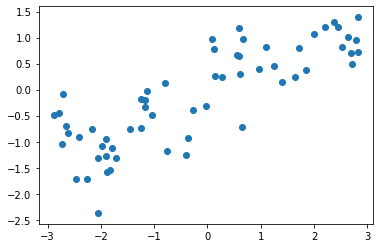

In [7]:
#create the wave dataset and draw it
import numpy as np
import matplotlib.pyplot as plt
X,y = make_wave(n_samples=60)
plt.scatter(X,y)

In [11]:
#split into test and trianing sets and fit linear model to trianing set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

In [16]:
#estimated coefficient
lr.coef_

lr.intercept_

-0.017111244147333823

In [17]:
#trinaing set performance
lr.score(X_train,y_train)

0.6592061059587275

In [18]:
lr.score(X_test,y_test)

0.6932519118518163

In [20]:
#performance of a regressor is evaluates using R^2, we engineer another feature in wave dataset X^2
import numpy as np
X_train_ext = np.concatenate((X_train,X_train**2),axis=1)#joins X with X^2
X_test_ext = np.concatenate((X_test,X_test**2),axis=1)

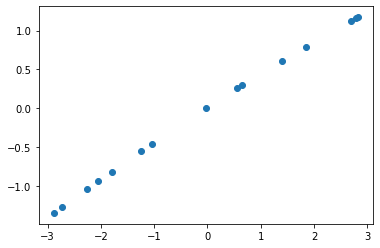

In [23]:
lr = LinearRegression().fit(X_train_ext,y_train)
y_hat = lr.predict(X_test_ext)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test,y_hat)
#function joins X with X^2 with axis 1
#if we fit LinearRegression to extended trianing set and apply reluting 
#model to the extended etst data X_test_ext we don't notice the error

In [25]:
print(lr.score(X_train_ext,y_train))
print(lr.score(X_test_ext,y_test))

0.6601817319830376
0.6861923283484095


In [33]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
def load_extended_boston():
    boston = load_boston()
    X = boston.data
    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias = False).fit_transform(X)
    return X, boston.target
X,y = load_extended_boston()
X.shape

(506, 104)

In [34]:
X_train,X_test,y_test,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [379, 45]